In [28]:
import os
import numpy as np
import pandas as pd
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt

In [29]:
fileList=os.listdir("NepalData")
fileList.sort()
dfDict=[]
for fileName in fileList:
    with open("NepalData/"+fileName, 'r') as file:
        file=gpxpy.parse(file)
        file.tracks[0].segments[0].points
        routeInfo=[]
        for track in file.tracks:
            for segment in track.segments:
                for point in segment.points:
                    routeInfo.append({
                        'latitude': point.latitude,
                        'longitude': point.longitude,
                        'elevation': point.elevation
                    })
        dfDict.append(pd.DataFrame(routeInfo))

In [30]:
combinedDF=pd.concat(dfDict, axis=0)
combinedDF

,latitude,longitude,elevation
0,27.693032,86.727966,2873.000000
1,27.693066,86.728054,2872.000000
2,27.693080,86.728066,2871.800049
3,27.693084,86.728072,2871.800049
4,27.693096,86.728179,2870.800049
...,...,...,...
3087,27.646199,86.724773,2802.600098
3088,27.646199,86.724773,2802.399902
3089,27.646192,86.724769,2802.000000
3090,27.646194,86.724729,2801.000000


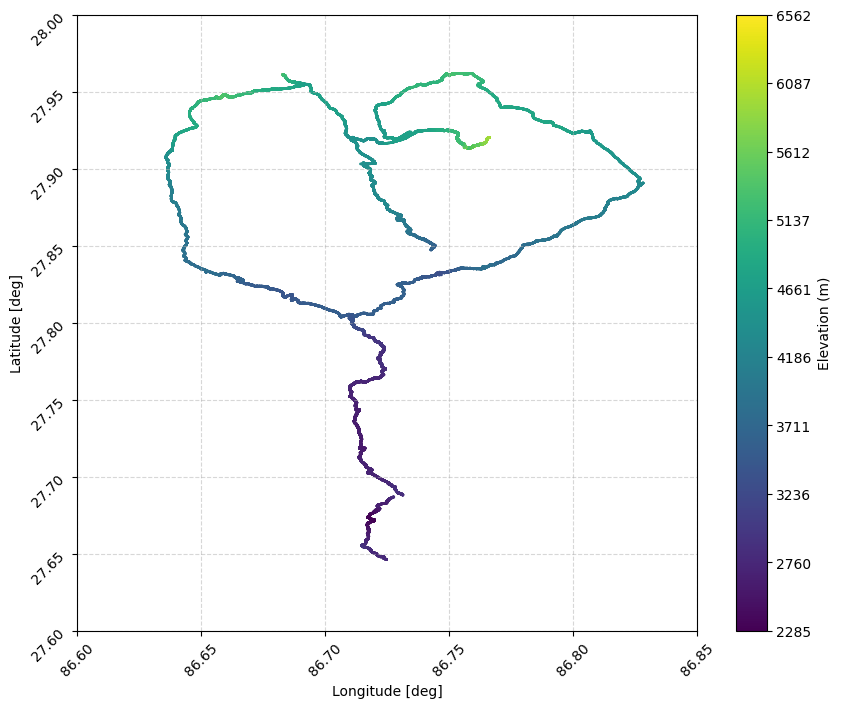

In [56]:
cmap = plt.colormaps["plasma"]
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(combinedDF['longitude'], combinedDF['latitude'], c=combinedDF['elevation'],s=0.9)
elev=combinedDF['elevation'].to_numpy()
plt.colorbar(mappable=plt.cm.ScalarMappable(norm=plt.Normalize(vmin=elev.min(), vmax=elev.max())), ax=ax,label='Elevation (m)',ticks=np.linspace(elev.min(), elev.max(),10))
ax.set(xlabel="Longitude [deg]", ylabel="Latitude [deg]",xlim=(86.6,86.85),ylim=(27.6,28))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(linestyle='--', alpha=0.5)
plt.savefig("NepalRouteMap.png",facecolor='white',dpi=300,bbox_inches='tight',)

In [57]:
86.85-86.6, 28-27.6

(0.25, 0.3999999999999986)

In [59]:
86.85+(0.25/2)


86.975

In [61]:
27.6+((28-27.6)/2)

27.8